Loading and primary data analysis

In [176]:
%pylab inline
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [177]:
girls = pd.read_csv('./data/girls.csv', header=0)

In [205]:
girls.head()

,Month,Year,Bust,Waist,Hips,Height,Weight
0,December,1953,91,61,91,165,54
1,March,1954,86,61,89,168,54
2,July,1955,91,61,91,166,52
3,December,1955,91,61,91,166,52
4,July,1956,91,61,86,157,48


In [204]:
girls.tail()

,Month,Year,Bust,Waist,Hips,Height,Weight
599,September,2008,86,64,91,170,52
600,October,2008,86,61,86,165,52
601,November,2008,86,53,81,168,49
602,December,2008,86,64,89,173,52
603,January,2009,86,60,91,170,55


In [179]:
girls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 7 columns):
Month     604 non-null object
Year      604 non-null int64
Bust      604 non-null int64
Waist     604 non-null int64
Hips      604 non-null int64
Height    604 non-null int64
Weight    604 non-null int64
dtypes: int64(6), object(1)
memory usage: 33.1+ KB


In [180]:
girls.describe()

,Year,Bust,Waist,Hips,Height,Weight
count,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000
mean,1983.057947,89.293046,59.529801,87.942053,167.887417,52.168874
std,14.843740,3.994011,3.616909,3.479142,5.776711,4.040585
min,1953.000000,81.000000,46.000000,61.000000,150.000000,42.000000
25%,1970.000000,86.000000,58.000000,86.000000,165.000000,49.000000
50%,1983.000000,89.000000,61.000000,89.000000,168.000000,52.000000
75%,1996.000000,91.000000,61.000000,91.000000,173.000000,54.000000
max,2009.000000,104.000000,89.000000,99.000000,188.000000,68.000000


In [211]:
girls.median()

Year      1983.0
Bust        89.0
Waist       61.0
Hips        89.0
Height     168.0
Weight      52.0
dtype: float64

In [181]:
girls[girls['Waist'] == 89]

,Month,Year,Bust,Waist,Hips,Height,Weight
483,December,1998,86,89,86,173,52


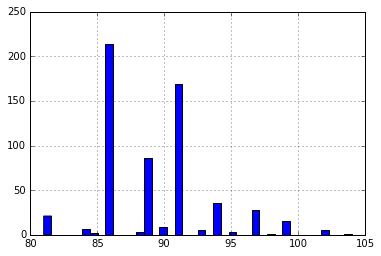

In [182]:
girls['Bust'].hist(bins=40, facecolor='blue', label="Bust")

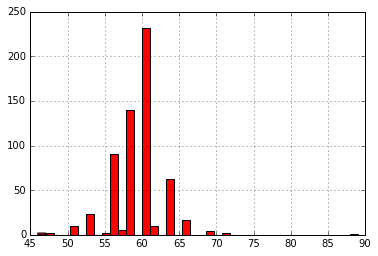

In [183]:
girls['Waist'].hist(bins=40, label="Waist", facecolor='red')

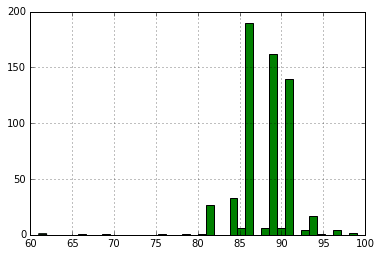

In [184]:
girls['Hips'].hist(bins=40, label="Hips", facecolor='green')

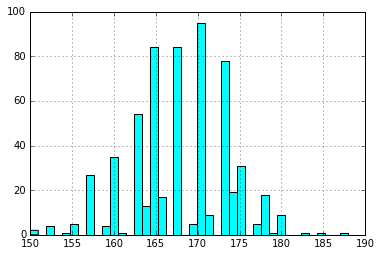

In [185]:
girls['Height'].hist(bins=40, label="Height", facecolor='cyan')

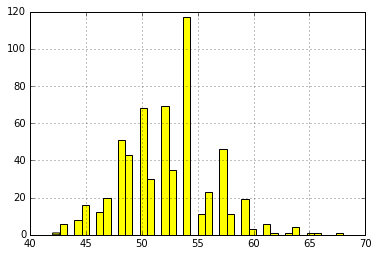

In [186]:
girls['Weight'].hist(bins=40, label="Weight", facecolor='yellow')

In [187]:
girl_params = np.array(girls.values[:,2:], dtype="float64")

In [188]:
girl_params

array([[  91.,   61.,   91.,  165.,   54.],
       [  86.,   61.,   89.,  168.,   54.],
       [  91.,   61.,   91.,  166.,   52.],
       ..., 
       [  86.,   53.,   81.,  168.,   49.],
       [  86.,   64.,   89.,  173.,   52.],
       [  86.,   60.,   91.,  170.,   55.]])

In [189]:
girl_params = scale(girl_params)

In [190]:
girl_params

array([[ 0.42773253,  0.40681624,  0.87966554, -0.50025187,  0.45355897],
       [-0.82517944,  0.40681624,  0.30433475,  0.01950523,  0.45355897],
       [ 0.42773253,  0.40681624,  0.87966554, -0.3269995 , -0.04182913],
       ..., 
       [-0.82517944, -1.80685052, -1.99698843,  0.01950523, -0.78491128],
       [-0.82517944,  1.23694128,  0.30433475,  0.88576708, -0.04182913],
       [-0.82517944,  0.1301079 ,  0.87966554,  0.36600997,  0.70125302]])

In [191]:
X = PCA(n_components=2).fit_transform(girl_params)

In [192]:
X

array([[ 0.73042102, -0.66639633],
       [ 0.29175855,  0.65458791],
       [ 0.5218909 , -0.62817574],
       ..., 
       [-2.31385976,  0.57353099],
       [ 0.71721598,  1.34017059],
       [ 0.74295332,  0.48915311]])

In [193]:
girls_num = X.shape[0]

In [194]:
girls_num

604L

Girls with the shortest waist

In [195]:
girls[girls['Waist'] == min(girls['Waist'])]

,Month,Year,Bust,Waist,Hips,Height,Weight
33,November,1960,84,46,81,157,45
54,September,1962,91,46,86,152,45


Girl with the biggest bust

In [196]:
girls[girls['Bust'] == max(girls['Bust'])]

,Month,Year,Bust,Waist,Hips,Height,Weight
79,October,1964,104,64,97,168,66


Girls with the largest hips

In [197]:
girls[girls['Hips'] == max(girls['Hips'])]

,Month,Year,Bust,Waist,Hips,Height,Weight
52,July,1962,99,58,99,170,59
173,September,1972,98,64,99,185,64


Girl with the largest height

In [198]:
girls[girls['Height'] == max(girls['Height'])]

,Month,Year,Bust,Waist,Hips,Height,Weight
507,December,2000,86,66,91,188,61


Girls with the lowest height

In [199]:
girls[girls['Height'] == min(girls['Height'])]

,Month,Year,Bust,Waist,Hips,Height,Weight
85,April,1965,86,51,86,150,44
97,April,1966,89,56,90,150,44


Girl with the largest weight

In [200]:
girls[girls['Weight'] == max(girls['Weight'])]

,Month,Year,Bust,Waist,Hips,Height,Weight
67,October,1963,94,66,94,183,68


Girl with the smallest weight

In [201]:
girls[girls['Weight'] == min(girls['Weight'])]

,Month,Year,Bust,Waist,Hips,Height,Weight
121,May,1968,84,53,89,157,42


In [202]:
sns.pairplot(girls[['Bust', 'Waist', 'Hips', 'Height', 'Weight']])

NameError: name 'sns' is not defined